In [392]:
#Fazendo as inportações principais
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

#Algoritimos M L
#from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [393]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [394]:
#Visualizando as 5 linhas de cima
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [395]:
#Correlação entre as variaveis

def plot_corr(test_df ,size=12):
    corr = test_df .corr()
    fig, ax = plt.subplots(figsize=(size, size,))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    sns.set(style="white")


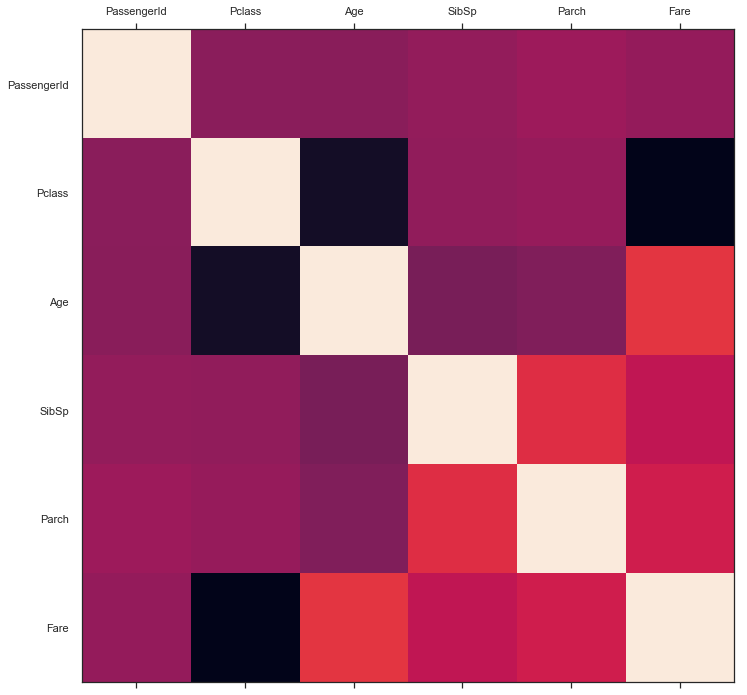

In [396]:
#vendo a correlação com grafico onde o mais claro é 1 e o mais escuro é mais distante de 1 sendo branco mais claro
plot_corr(test )

In [397]:
sex_survived= train.groupby(by=['Sex','Survived'])['Survived'].agg(['count']).reset_index()
sex_survived

,Sex,Survived,count
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


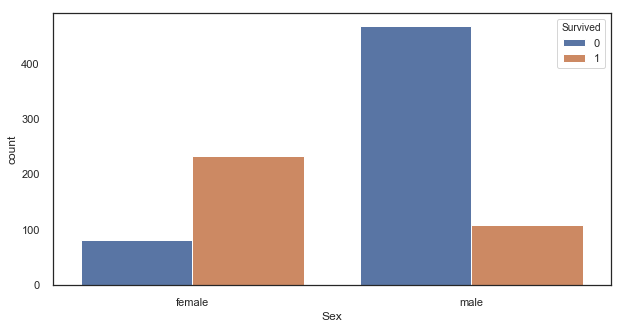

In [398]:
# Grafico com Sobreviventes por Sexo
plt.figure(figsize=(10, 5))
sns.barplot(data=sex_survived, x='Sex',y='count', hue='Survived');

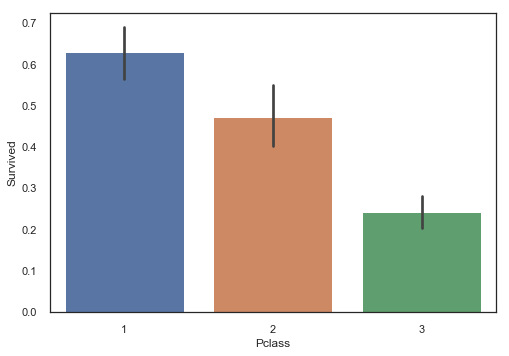

In [399]:
#Grafico de Sobreviventes por classe, notamos que tem mais sobreviventes na classe 1
sns.barplot(x='Pclass', y='Survived', data=train)

In [400]:
Sob = train["Survived"]
Train = train.drop(columns="Survived", axis = 1)

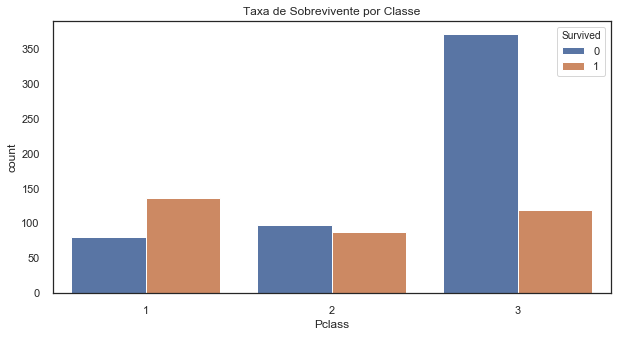

In [401]:
#Grafico com sobrevivente x Não sobreviente por classe
plt.figure(figsize=(10,5))
plt.title("Taxa de Sobrevivente por Classe")
sns.countplot(Train["Pclass"], hue=Sob)

In [402]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [403]:
train = train.drop(['PassengerId'], axis=1)

In [404]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [405]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 

In [406]:
# Agora podemos excluir a variavel cabine
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [407]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
Deck        891 non-null int32
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 73.2+ KB


In [408]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # computar números aleatórios entre a média, std e is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # preencher valores NaN na coluna Idade com valores aleatórios gerados
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
    
train["Age"].isnull().sum()

0

In [409]:
#Visualizndo o Tipo das Colunas
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
Deck        891 non-null int32
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 69.7+ KB


In [410]:
train["Age"].isnull().sum()

0

In [411]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [412]:
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [413]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
Deck        891 non-null int32
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 69.7+ KB


In [414]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [415]:
#Organizando os nomes
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # Pegando titulos
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # Reformatando os titulos
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].fillna(0)# Tranformando os NaN em 0  
    dataset['Title'] = dataset['Title'].map(titles)# Tranformando em Int

In [379]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [380]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [381]:
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [382]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [383]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [384]:
#Organizando grupos para Tarifa
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

In [385]:
#Resultado da divisão dos grupos
train['Fare'].value_counts()

2    169
1    158
4    152
5    147
0    138
3    127
Name: Age, dtype: int64

In [386]:
#Organizando Grupos de Idade
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 17, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 17) & (dataset['Age'] <= 22), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 28), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 33), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 41), 'Age'] = 4
    dataset.loc[ dataset['Age'] > 41, 'Age'] = 5    

In [387]:
#Visualizando os grupos de idade
train['Age'].value_counts()

0    241
2    223
1    216
4    211
Name: Fare, dtype: int64

In [389]:
#Criando os Modelos de ML

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

In [390]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.48 %


In [391]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

87.99 %
